In [ ]:
from data_fetcher.data_fetcher import DataFetcher
from data_fetcher.graphics import plot_timeseries, accumulate_data

Data saved to filtered_data.csv


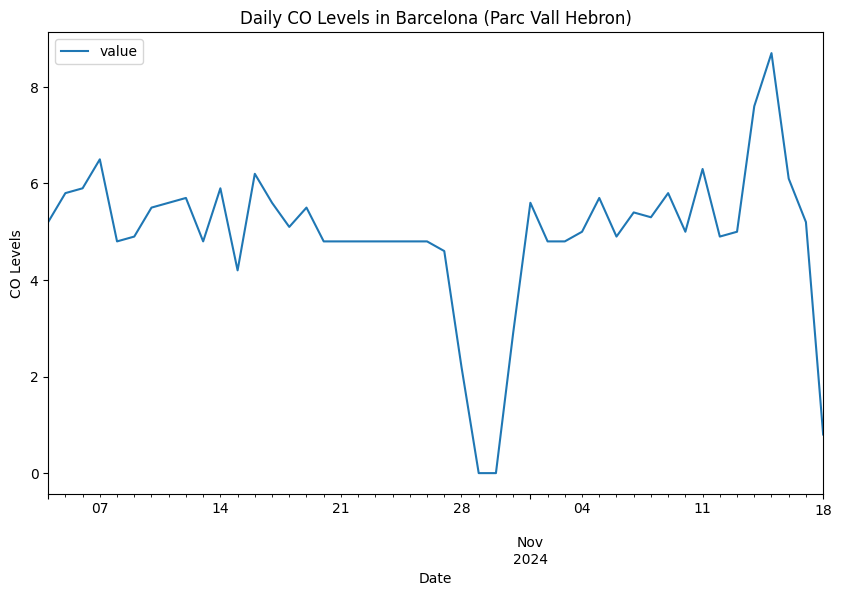

In [2]:
fetcher = DataFetcher("analisi.transparenciacatalunya.cat", "9Hbf461pXC6Lin1yqkq414Fxi", "tasf-thgu")
processed_data = fetcher.process_and_save_data("municipi='Barcelona'")
#station = 'Barcelona (Observatori Fabra)'
resampled = accumulate_data(processed_data, 'Barcelona (Parc Vall Hebron)', 'CO', 'D')
#resampled = accumulate_data(processed_data, station, 'CO', 'D')
#resampled_daily = resampled.groupby(resampled.index.date).sum()
plot_timeseries(resampled, "Daily CO Levels in Barcelona (Parc Vall Hebron)", "CO Levels")

In [3]:
import os

In [4]:
from matplotlib import pyplot as plt
import pandas as pd

In [5]:
import geopandas as gpd

In [6]:
!bash download_shp.sh

--2024-11-18 16:33:58--  https://datacloud.icgc.cat/datacloud/divisions-administratives/shp/divisions-administratives-v2r1-20240705.zip
Resolving datacloud.icgc.cat (datacloud.icgc.cat)... 84.88.72.86
Connecting to datacloud.icgc.cat (datacloud.icgc.cat)|84.88.72.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67343799 (64M) [application/x-zip-compressed]
Saving to: ‘divisions-administratives-v2r1-20240705.zip’

divisions-administr 100%[===================>]  64.22M  11.0MB/s    in 5.7s    

2024-11-18 16:34:03 (11.2 MB/s) - ‘divisions-administratives-v2r1-20240705.zip’ saved [67343799/67343799]

Archive:  divisions-administratives-v2r1-20240705.zip
  inflating: divisions-administratives-v2r1-20240705.html  
  inflating: divisions-administratives-v2r1-caps-municipi-20240705.cpg  
  inflating: divisions-administratives-v2r1-caps-municipi-20240705.dbf  
  inflating: divisions-administratives-v2r1-caps-municipi-20240705.prj  
  inflating: divisions-administrat

['shp_cat/divisions-administratives-v2r1-comarques-1000000-20240705.shp']
es-v2r1-comarques


,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry
0,01,Alt Camp,Valls,537.8597,"POLYGON ((373020.449 4590188.741, 372482.744 4..."
1,02,Alt Empordà,Figueres,1356.9070,"MULTIPOLYGON (((513760.140 4662388.220, 513758..."
2,03,Alt Penedès,Vilafranca del Penedès,592.5548,"POLYGON ((386593.300 4595896.200, 388616.100 4..."
3,04,Alt Urgell,la Seu d'Urgell,1446.6689,"MULTIPOLYGON (((360800.100 4649174.000, 360624..."
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((327485.124 4721105.796, 327436.728 4..."


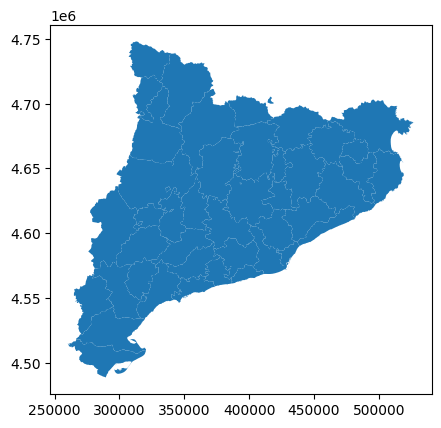

In [7]:
dir_list_cat = !ls shp_cat/*comarques*.shp
ids = {x:x[31:-21] for x in dir_list_cat}
print(dir_list_cat)
cat_maps = {}
for maps in dir_list_cat:
    cat_maps[ids[maps]] = gpd.read_file(maps, crs="EPSG:4326")
    print(ids[maps])
    display(cat_maps[ids[maps]].head())
    cat_maps[ids[maps]].plot()
    plt.show()

In [ ]:
fetcher = DataFetcher("analisi.transparenciacatalunya.cat", "9Hbf461pXC6Lin1yqkq414Fxi", "tasf-thgu")
stations = fetcher.list_available_options_with_filter("nom_estacio", "municipi='Barcelona'")
station_coordinates = pd.DataFrame({})
for estacio in stations:
    station_coordinates = pd.concat([station_coordinates, fetcher.get_coordinates(estacio)], ignore_index=True)
print(station_coordinates)

                         nom_estacio    latitud   longitud
0      Barcelona (Observatori Fabra)   41.41843  2.1238973
1               Barcelona (Eixample)  41.385315  2.1537998
2  Barcelona (Gràcia - Sant Gervasi)  41.398724  2.1533988
3                  Barcelona (Sants)   41.37878   2.133099
4             Barcelona (Ciutadella)  41.386406  2.1873982
5            Barcelona (Palau Reial)   41.38749  2.1151996
6       Barcelona (Parc Vall Hebron)   41.42611  2.1480017
7               Barcelona (Poblenou)   41.40388   2.204501


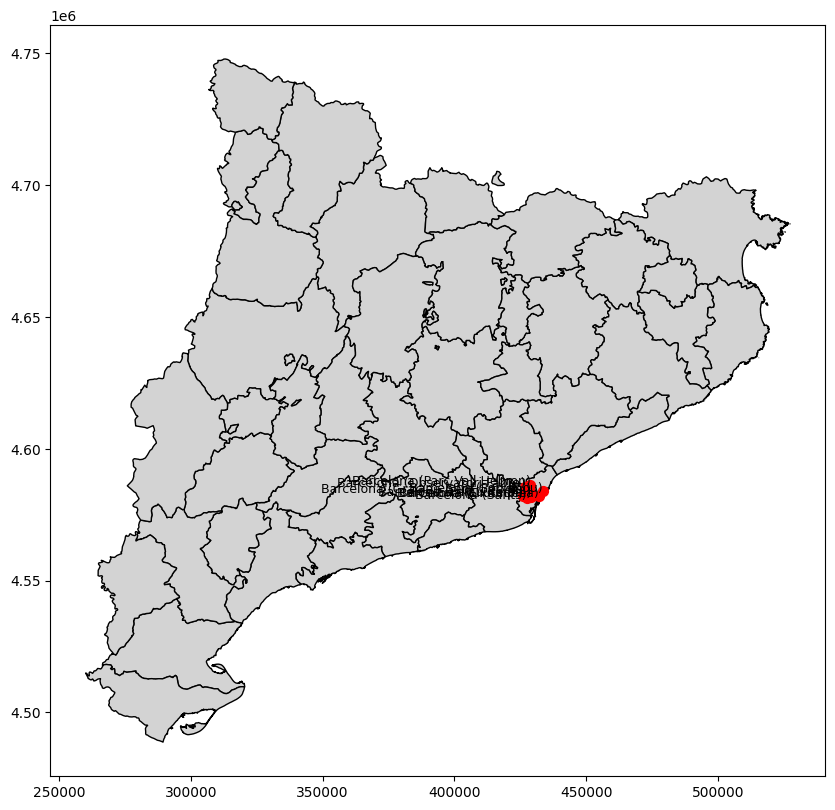

In [10]:
# Create a GeoDataFrame from the data
stations_df = gpd.GeoDataFrame(
    station_coordinates,
    geometry=gpd.points_from_xy(station_coordinates['longitud'], station_coordinates['latitud']),
    crs="EPSG:4326"  # WGS 84 coordinate system
)

# Load or create a base map (e.g., a world map)
cat = gpd.read_file('shp_cat/divisions-administratives-v2r1-comarques-1000000-20240705.shp')

stations_df = stations_df.to_crs(cat.crs)

# Plot the map and add station points
fig, ax = plt.subplots(figsize=(10, 10))
cat.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the stations
stations_df.plot(ax=ax, color='red', markersize=50)

# Add labels for the stations (optional)
for x, y, label in zip(stations_df.geometry.x, stations_df.geometry.y, stations_df['nom_estacio']):
    ax.text(x, y, label, fontsize=9, ha='right')

plt.show()

Data saved to filtered_data.csv
{'Barcelona (Palau Reial)': 0, 'Barcelona (Gràcia - Sant Gervasi)': 0, 'Barcelona (Parc Vall Hebron)': 0, 'Barcelona (Sants)': 0, 'Barcelona (Poblenou)': 0, 'Barcelona (Eixample)': 0, 'Barcelona (Observatori Fabra)': 0, 'Barcelona (Ciutadella)': 0}
{'Barcelona (Palau Reial)': 33083, 'Barcelona (Gràcia - Sant Gervasi)': 36639, 'Barcelona (Parc Vall Hebron)': 13927, 'Barcelona (Sants)': 11269, 'Barcelona (Poblenou)': 14194, 'Barcelona (Eixample)': 51389, 'Barcelona (Observatori Fabra)': 5792, 'Barcelona (Ciutadella)': 20808}
dict_values([33083, 36639, 13927, 11269, 14194, 51389, 5792, 20808])
187101
{'Barcelona (Palau Reial)': 0.1768189373653802, 'Barcelona (Gràcia - Sant Gervasi)': 0.19582471499350618, 'Barcelona (Parc Vall Hebron)': 0.07443573257224707, 'Barcelona (Sants)': 0.06022950171297855, 'Barcelona (Poblenou)': 0.07586276930641739, 'Barcelona (Eixample)': 0.27465914131939434, 'Barcelona (Observatori Fabra)': 0.030956542188443674, 'Barcelona (Ciuta

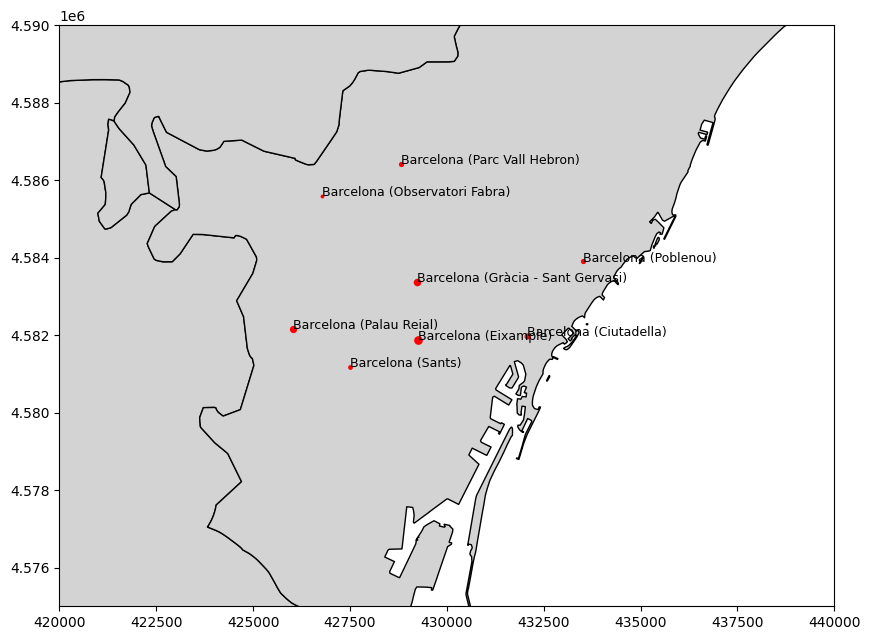

In [19]:
fetcher = DataFetcher("analisi.transparenciacatalunya.cat", "9Hbf461pXC6Lin1yqkq414Fxi", "tasf-thgu",  limit = 10000)
processed_data = fetcher.process_and_save_data("municipi='Barcelona'")

stations = fetcher.list_available_options_with_filter("nom_estacio", "municipi='Barcelona'")

pollutants = fetcher.list_available_options_with_filter("contaminant", "municipi='Barcelona'")

accumulator = {station: 0 for station in stations}

print(accumulator)

#print(processed_data)

for station in stations:
    for contaminant in pollutants:
        if not processed_data[(processed_data['nom_estacio'] == station) & (processed_data['contaminant'] == contaminant)].empty:
            resampled = accumulate_data(processed_data, station, contaminant, 'M')
            #print(resampled['value'].sum())
            accumulator[station] =+ resampled['value'].sum()

print(accumulator)

print(accumulator.values())

norm = sum(list((accumulator.values())))

accumulator = {station: accumulator[station]/norm for station in stations}

print(norm)

print(accumulator)

# Load or create a base map (e.g., a world map)
cat = gpd.read_file('shp_cat/divisions-administratives-v2r1-comarques-1000000-20240705.shp')

stations_df = stations_df.to_crs(cat.crs)

print(stations_df)

# Plot the map and add station points
fig, ax = plt.subplots(figsize=(10, 10))
cat.plot(ax=ax, color='lightgray', edgecolor='black')

for station in stations_df['nom_estacio']:
    print("STATION: ", station)
    value = accumulator.get(station, 0)
    print("VALUE: ", value)
    # Plot the stations
    stations_df[stations_df["nom_estacio"] == station].plot(ax=ax, color='red', markersize=value*100)

# Add labels for the stations (optional)
for x, y, label in zip(stations_df.geometry.x, stations_df.geometry.y, stations_df['nom_estacio']):
    ax.text(x, y, label, fontsize=9, ha='left')

# Set the limits for the plot to focus on the region near latitude 41 and longitude 2
ax.set_xlim(420000, 440000)
ax.set_ylim(4.575e6, 4.590e6)

plt.show()